# Numpy

Tests for Einsum and Einops are included below (see outline)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check numpy version
print(np.__version__)

2.0.2


In [3]:
def chessboard(shape):
  return np.indices(shape).sum(axis=0) % 2

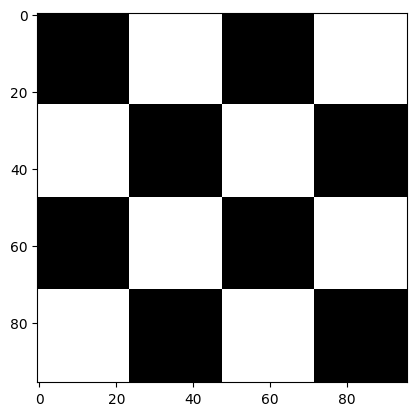

In [4]:
img = chessboard((4,4))*255
img = np.repeat(img, (24), axis=0)
img = np.repeat(img, (24), axis=1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [5]:
from matplotlib import image
dog = image.imread('assets/aki_dog.jpg')

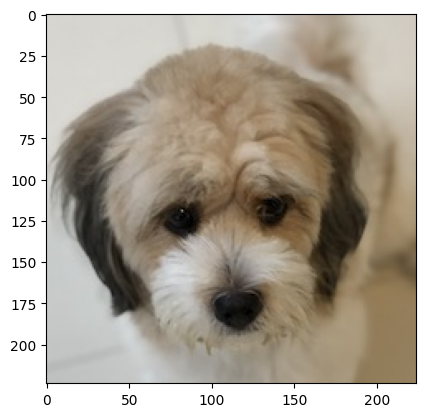

In [6]:
plt.imshow(dog);

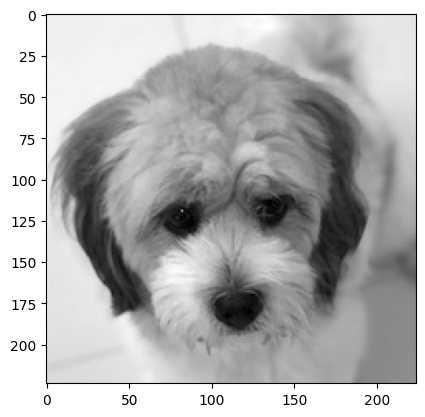

In [7]:
plt.imshow(np.mean(dog,axis=-1), cmap='gray');


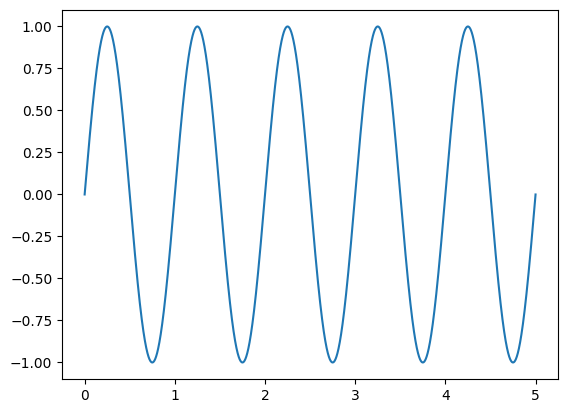

In [8]:
samples_per_sec = 22050
freq = 1
n_points = samples_per_sec*5
t = np.linspace(0,5,n_points)
data = np.sin(2*np.pi*freq*t)
plt.plot(t,data);

# Einsum

In [9]:
from numpy import einsum

In [10]:
w = np.arange(6).reshape(2,3).astype(np.float32) 
x = np.ones((3,1), dtype=np.float32)

print(w)
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]
[[1.]
 [1.]
 [1.]]


In [11]:
y = np.matmul(w,x)
y_at = w @ x
y_ein = einsum('ij,jk->ik',w,x)

print(y)
print(y_at)
print(y_ein)

[[ 3.]
 [12.]]
[[ 3.]
 [12.]]
[[ 3.]
 [12.]]


In [12]:
w = np.arange(6).reshape(2,3).astype(np.float32) 
x = np.ones((1,3), dtype=np.float32)

print(w)
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]
[[1. 1. 1.]]


In [13]:
y = np.matmul(w,np.transpose(x))
y_at = w @ x.T
y_ein = einsum('ij,kj->ik', w, x)

print(y)
print(y_at)
print(y_ein)

[[ 3.]
 [12.]]
[[ 3.]
 [12.]]
[[ 3.]
 [12.]]


In [14]:
w = np.arange(9).reshape(3,3).astype(np.float32)
print(w)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [15]:
print(np.diag(w))
print(einsum('ii->i',w))

[0. 4. 8.]
[0. 4. 8.]


In [16]:
print(np.trace(w))
print(einsum('ii->',w))

12.0
12.0


In [17]:
print(np.sum(w, axis=0))
print(einsum('ij->j',w))

[ 9. 12. 15.]
[ 9. 12. 15.]


In [18]:
print(np.transpose(w))
print(einsum('ij->ji',w))

[[0. 3. 6.]
 [1. 4. 7.]
 [2. 5. 8.]]
[[0. 3. 6.]
 [1. 4. 7.]
 [2. 5. 8.]]


In [19]:
a = np.ones((3,), dtype=np.float32)
b = np.ones((3,), dtype=np.float32) * 2

In [20]:
d = np.dot(a,b)
i = np.inner(a,b)
o = np.outer(a,b)

print(d)
print(i)
print(o)

6.0
6.0
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [21]:
d = einsum("i,i->", a, b)
i = einsum("i,i->", a, b)
o = einsum("i,j->ij", a, b)

print(d)
print(i)
print(o)

6.0
6.0
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


# Einops

In [22]:
from einops import rearrange, reduce, repeat
from matplotlib import image
from matplotlib import pyplot as plt

In [23]:
img = image.imread('assets/aki_dog.jpg')
print(img.shape)

(224, 224, 3)


In [24]:
img_flattened = rearrange(img, 'h w c -> (h w c)')
print(img_flattened.shape)

(150528,)


(4, 112, 112, 3)


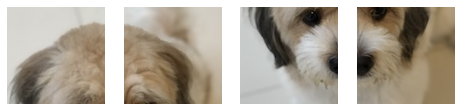

In [25]:
# image to patches
img_patches = rearrange(img, "(p1 h) (p2 w) c -> (p1 p2) h w c", p1=2, p2=2)
print(img_patches.shape)

# plot 4 patches
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 2), dpi=72, sharex=True, sharey=True)
for i in range(len(ax)):
    ax[i].imshow(img_patches[i])
    ax[i].axis('off')


## Reverse Image Patches

(2, 224, 224, 3)


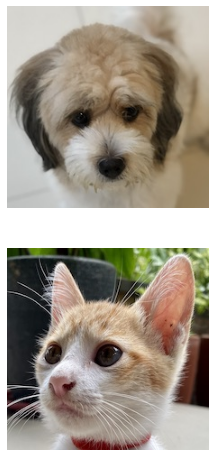

In [26]:
img1 = image.imread("assets/aki_dog.jpg") 
img2 = image.imread("assets/wonder_cat.jpg") 
imgs = np.array([img1, img2])
print(imgs.shape) # shape: b h w c

_, ax = plt.subplots(nrows=imgs.shape[0], ncols=1, figsize=(4, 8), dpi=72, sharex=True, sharey=True)
for i in range(imgs.shape[0]):
    ax[i].imshow(imgs[i])
    ax[i].axis('off')

In [27]:
imgs = rearrange(imgs, "b (k h) w c -> k b h w c", k = 8)
print(imgs.shape) # shape: k b h w c

(8, 2, 28, 224, 3)


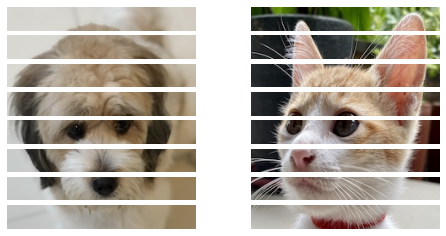

In [28]:
# plot imgs
_, ax = plt.subplots(nrows=imgs.shape[0], ncols=imgs.shape[1], figsize=(8, 4), dpi=72, sharex=True, sharey=True)

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].imshow(imgs[i,j])
        ax[i][j].axis('off')

(8, 2, 28, 224, 3)


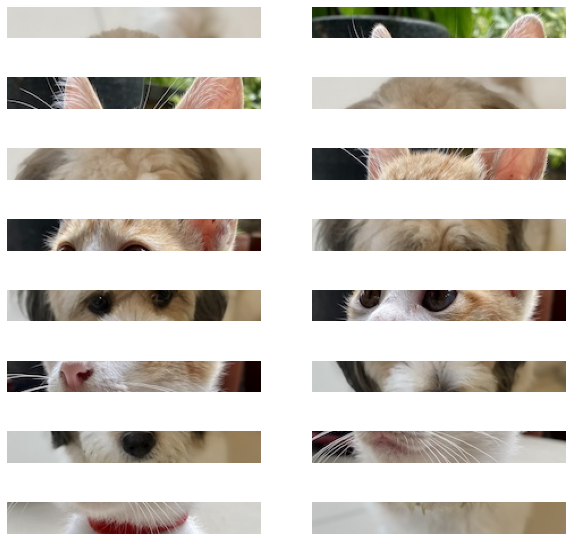

In [29]:
# reverse every even patch using numpy
even_patches = imgs[1::2]
even_patches = even_patches[:,::-1]

imgs_reverse = imgs.copy()
imgs_reverse[1::2] = even_patches

print(imgs_reverse.shape)

_, ax = plt.subplots(nrows=imgs_reverse.shape[0], ncols=imgs_reverse.shape[1], figsize=(10, 10), dpi=72, sharex=True, sharey=True)

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].imshow(imgs_reverse[i,j])
        ax[i][j].axis('off')

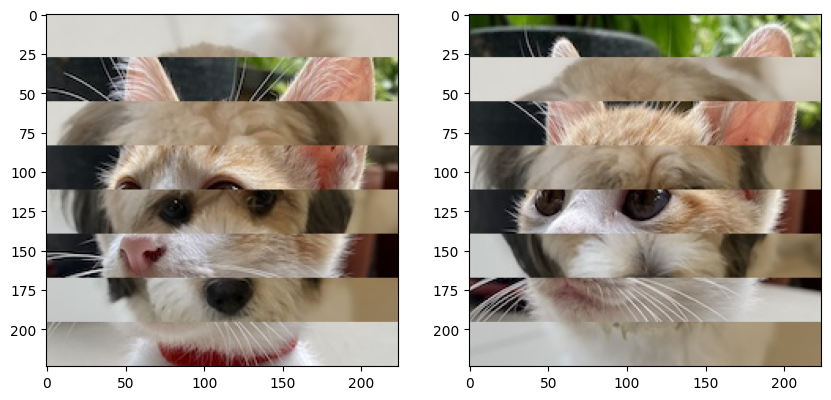

In [30]:
# combine 2 img patches
imgs_reverse = rearrange(imgs_reverse, "k b h w c -> b (k h) w c") # from k b h w c to b (k h) w c

plt.figure(figsize=(10,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.imshow(imgs_reverse[i]);

(4, 2, 112, 112, 3)


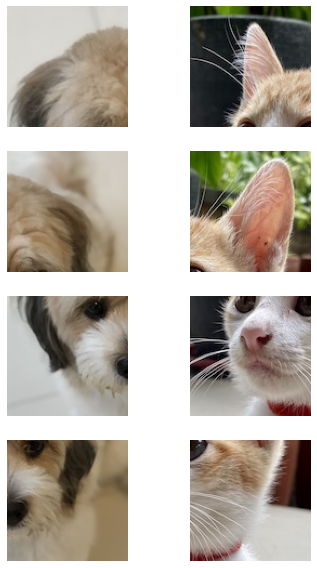

In [37]:
# Divide imgs into 4 patches
imgs = np.array([img1, img2])

imgs_explore = rearrange(imgs, "b (k1 h) (k2 w) c -> (k1 k2) b h w c", k1 = 2, k2 = 2)
print(imgs_explore.shape) # shape: k1*k2 b h w c

_, ax = plt.subplots(nrows=imgs_explore.shape[0], ncols=imgs_explore.shape[1], figsize=(6, 10), dpi=72, sharex=True, sharey=True)

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].imshow(imgs_explore[i,j])
        ax[i][j].axis('off')

In [52]:
imgs_switch = np.concatenate([imgs_explore[0], imgs_explore[1,::-1], imgs_explore[2,::-1], imgs_explore[3]], axis=0)
print(imgs_switch.shape)

imgs_switch = rearrange(imgs_switch, "(k b) h w c -> k b h w c", k = 4)
print(imgs_switch.shape)



(8, 112, 112, 3)
(4, 2, 112, 112, 3)


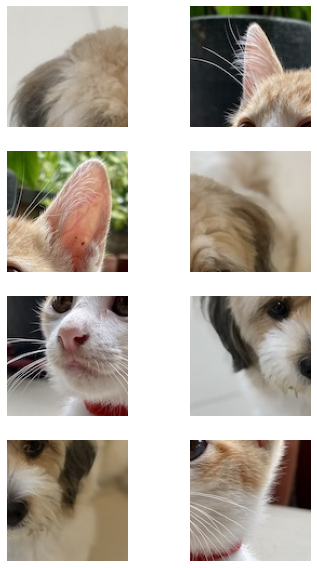

In [53]:
_, ax = plt.subplots(nrows=imgs_switch.shape[0], ncols=imgs_switch.shape[1], figsize=(6, 10), dpi=72, sharex=True, sharey=True)

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].imshow(imgs_switch[i,j])
        ax[i][j].axis('off');

(4, 2, 112, 112, 3)


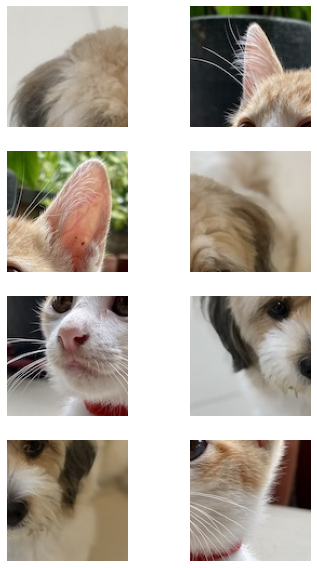

In [47]:
imgs_switch = np.concatenate([imgs_explore[0:1], imgs_explore[1:2,::-1], imgs_explore[2:3,::-1], imgs_explore[3:4]], axis=0)
print(imgs_switch.shape)

_, ax = plt.subplots(nrows=imgs_switch.shape[0], ncols=imgs_switch.shape[1], figsize=(6, 10), dpi=72, sharex=True, sharey=True)

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].imshow(imgs_switch[i,j])
        ax[i][j].axis('off');

(4, 2, 112, 112, 3)


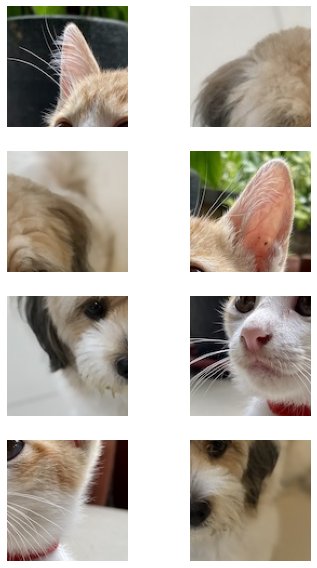

In [38]:
# switch first and last part
first_patch_reversed = imgs_explore[0,::-1]
last_patch_reversed = imgs_explore[-1,::-1]


imgs_switch = imgs_explore.copy()
imgs_switch[0] = first_patch_reversed
imgs_switch[-1] = last_patch_reversed

print(imgs_switch.shape)

_, ax = plt.subplots(nrows=imgs_switch.shape[0], ncols=imgs_switch.shape[1], figsize=(6, 10), dpi=72, sharex=True, sharey=True)

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].imshow(imgs_switch[i,j])
        ax[i][j].axis('off');

(2, 224, 224, 3)


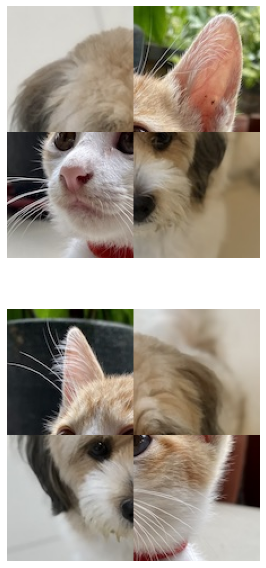

In [54]:
# combine 4 patches
imgs_fused = rearrange(imgs_switch, "(k1 k2) b h w c -> b (k1 h) (k2 w) c", k1 = 2, k2 = 2)

print(imgs_fused.shape)

_, ax = plt.subplots(nrows=imgs_fused.shape[0], ncols=1, figsize=(6, 10), dpi=72, sharex=True, sharey=True)

for i in range(ax.shape[0]):
    ax[i].imshow(imgs_fused[i])
    ax[i].axis('off');


## Grayscale, Upsize, Downsize

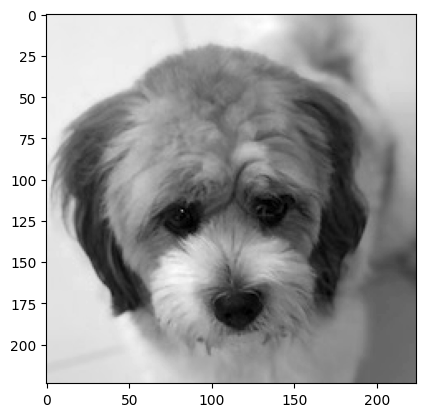

In [56]:
# convert img1 to float tensors
img1 = image.imread("assets/aki_dog.jpg").astype(np.float32)

#rgb to grayscale
img1 = reduce(img1, "h w c -> h w", "mean")
plt.imshow(img1, cmap='gray');

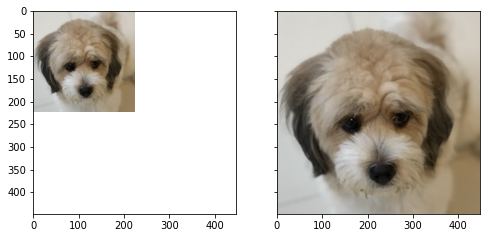

In [233]:
# convert img1 to float tensors
img1 = image.imread("assets/aki_dog.jpg")

# upsize img1
img1_upsized = repeat(img1, 'h w c -> (h 2) (w 2) c');

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(img1);
ax[1].imshow(img1_upsized);

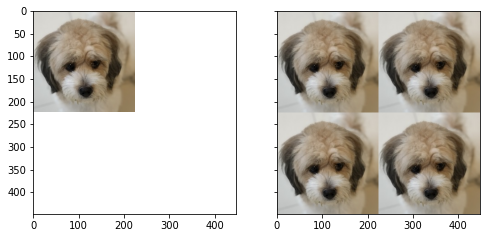

In [234]:
# convert img1 to float tensors
img1 = image.imread("assets/aki_dog.jpg")

# upsize img1
img1_upsized = repeat(img1, 'h w c -> (2 h) (2 w) c');

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(img1);
ax[1].imshow(img1_upsized);

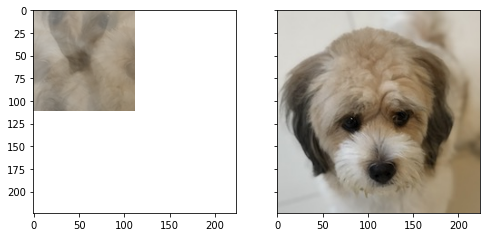

In [235]:
# downsize 
img1 = img1.astype(np.float32)
img1_downsized = reduce(img1, "(2 h ) (2 w ) c -> h w c", 'mean').astype(np.uint8)
img1 = img1.astype(np.uint8)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(img1_downsized);
ax[1].imshow(img1);